# Bilderverarbeitung in Python

In diesem Notebook bringen wir Dir ein paar Grundlagen bei, wie man in **Python** mit Bildern arbeiten kann. Du lernst Bilder zu laden und leicht zu bearbeiten. Damit weißt du dann auch schon alles, damit wir endlich mit Quantencomputern beginnen können.

[Hier](./Python_Basics.ipynb) findest du übrigens die Grundlagen zur Programmierung mit Python falls du nochmal etwas nachschauen möchtest.

Als erstes müssen wir aber noch ein paar sogenannter `imports` machen. Hier laden wir Funktionen, die andere (oder wir in anderen Dateien) geschrieben haben, damit wir sie in diesem Notebook verwenden können. Du musst in der nächsten Zelle also nichts machen oder sie verstehen. Wichtig ist nur, dass Du sie ausführst, damit der Computer weiß, dass wir gleich diese Funktionen verwenden wollen. Anschließend können wir sie verwenden wie `print()` oder `len()`, die hatten wir ja auch nicht selbst geschrieben. 

Danach geht es aber endlich los. 

In [1]:
import numpy
from utils import show_bw_image, load_image
from matplotlib.pyplot import imshow
from copy import copy

Wie Du wahrscheinlich weißt, sind Bilder aus ganz vielen **Pixeln** zusammengesetzt. Ein Pixel wiederum besteht bei einem Farbbild aus drei Werten: Rot, Grün, Blau - kurz: RGB. Bei einem Schwarz-Weiß-Bild besteht ein Pixel nur aus einem Wert. Aus wie vielen Werten ein Pixel besteht, wird auch als die Anzahl der **Farbkanäle** bezeichnet.  
Die Werte geben jeweils an, wie stark die Farbe in diesem Bild ist. Aber dazu gleich mehr.

Ein Bild kann man sich somit als eine Art Tabelle vorstellen. Diese hat:
- so viele Zeilen wie das Bild hoch ist (in Pixeln)
- so viele Spalten wie das Bild breit ist (in Pixeln) 

In einer Tabellenposition stehen dann die Werte dieses Pixels an genau dieser Stelle. Bei einem Schwarz-Weiß-Bild steht da also ein Wert. Bei einem Farbbild drei Werte. 

Informatiker und Mathematiker nennen so eine Tabelle auch gerne **Matrix**. Auch in der Schule benutzt man die schon in den oberen Klassenstufen.  

Eine Form, um diese Matrix darzustellen, kennst du sogar schon: die Liste. Denn eine Liste kann auch Listen beinhalten. Aber machen wir erstmal ein Beispiel eines Schwarz-Weiß-Bildes.

In [2]:
image = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

Wie kannst Du dir das vorstellen? Jeder der "inneren" Liste (also `[0, 0, 0]`) stellt eine ganze Zeile dar. Die äußere Liste hält alle diese Zeilen zusammen. Die Pixelwerte sind die Zahlen (hier nur `0`).

Das ist schon ein Bild. Mit dem folgenden Code, können wir ihn uns anzeigen lassen. (Vergiss nicht vorher die Zelle oben drüber ausgeführt zu haben.)

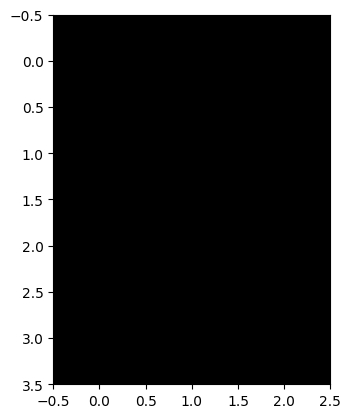

In [3]:
show_bw_image(image)

Nur Schwarz - sehr langweilig. Aber wenn wir mal einen Wert verändern, sieht es schon anders aus. Wir machen aus einer Null eine `255`.

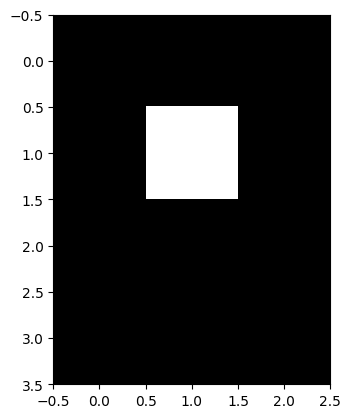

In [4]:
image = [[0, 0, 0], [0, 255, 0], [0, 0, 0], [0, 0, 0]]
show_bw_image(image)

Jetzt kann man schon viel besser erkennen, was wir da eigentlich gemacht haben. 

Die inneren Liste sind ja jeweils eine Zeile. Die Länge dieser Listen gibt also an, wie viele Pixel in einer Zeile sind. 

Wie viele Listen in der äußeren Liste sind, legt fest, wie viele Zeilen es gibt. Ihre Länge ist also die Höhe des Bildes.

Wie wo du oben sehen kannst bedeutet `0` schwarzes Pixel und `255` weißes Pixel. 

Mit diesem Wissen guck noch einmal, warum wir durch die `255` an dieser Stelle einen weißen Pixel an dieser Stelle erzeugt hat. 

**Aufgabe:** Versuche mal den Pixel ganz unten links auf weiß zu setzen.

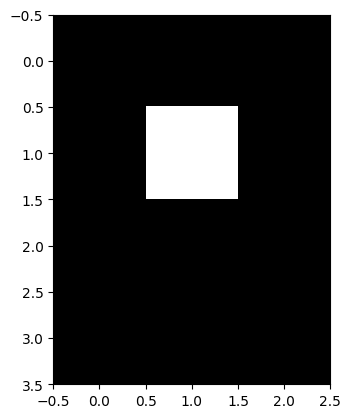

In [5]:
image = [[0, 0, 0], [0, 255, 0], [0, 0, 0], [0, 0, 0]]
show_bw_image(image)

Wie Du dir vielleicht schon gedach hast, kann man nicht nur `0` oder `255`nehmen. Das ist nämlich ein fließende Übergang von Schwarz zu Weiß. So ist zum Beispiel `127` genau die Mitte und Grau. 

**Aufgabe:** Passe mal beliebig die Werte an und erzeuge so ein eigenes, kleines "Bild". Beachte: Die Werte dürfen nur zwischen `0` und `255` liegen.

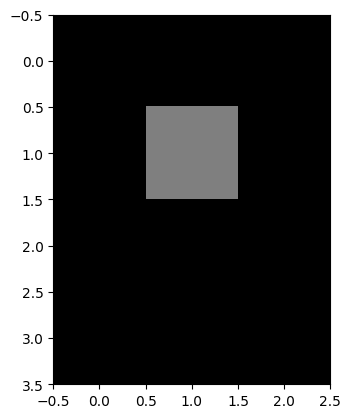

In [6]:
image = [[0, 0, 0], [0, 127, 0], [0, 0, 0], [0, 0, 0]]
show_bw_image(image)

# Farbbilder als numpy array

Mit so kleinen Schwarz-Weiß-Bildern ist das mit Listen (von Listen) noch möglich. Danach wird es schnell unübersichtlich, denn "normale" Bilder bestehen aus Millionen von Werten. Für den Computer wäre das kein Problem, der kann damit gut umgehen. Aber effektiv kann der damit auch nicht mehr wirklich arbeiten. Deswegen nutzt man sogenannte `arrays` aus dem Paket `numpy`. Pakete beinhalten viele Datentypen und Funktionen aus einem Bereich. Wir nutzen numpy jetzt für Bilder.

Array, Matrix und Tabelle sind eigentlich genau das gleiche: immer eine Liste von Listen von Listen ... 
Wie oft man so Listen verschachtelt nennt man auch seine **Dimension**. Ein Schwarz-Weißbild hat die Dimension `2`, ein Farbbild die Dimension `3`.

So laden wir ein Bild von unserem Computer. Den Pfad zu der Datei müssen wir an diese Funktion als String übergeben.

In [7]:
image = load_image("./images/Kitten.jpg")

Mit dem nächsten Code, können wir ein Farbbild anzeigen lassen. Damit das funktioniert, musst du erst die vorherige Zelle ausgeführt haben.

(Da kommt noch eine komische Zeile Text vor dem Bild. Die kannst du ignorieren.)

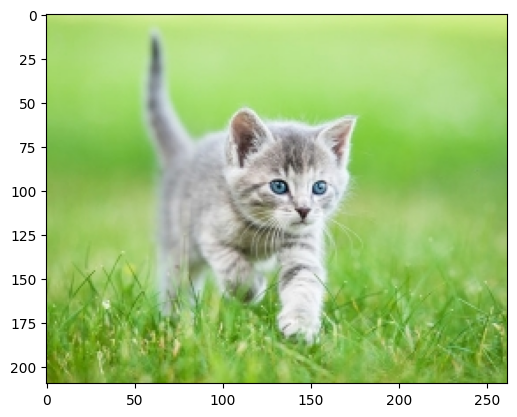

In [8]:
imshow(image)

An der Achsenbeschriftung kannst du hier schon sehen, wie groß dieses Bild in Pixeln ungefähr ist. Da das Bild als numpy array geladen wurde, gibt es aber auch die Möglichkeit `shape` zu benutzen, das uns das exakt für jede Dimension verrät. Ähnlich wie es `len()` bei Listen getan hat. `shape` rufen wir aber direkt auf der Liste mit einem Punkt getrennt auf (das hast du auch schon gesehen. Bei `my_list.append()` um etwas an eine Liste anzuhängen. Da wurde `append()` auch direkt angehängt.). 

`shape` ist keine Funktion, sondern eine Eigenschaft, die das numpy array hat (Informatiker nennen das auch Attribut). Deswegen gibt es auch nicht, wie sonst bei Funktionen, runde Klammern.

In [9]:
print(image.shape)

print("Anzahl Zeilen:", image.shape[0])
print("Anzahl Spalten:", image.shape[1])
print("Anzahl Farbkanäle:", image.shape[2])

(210, 262, 3)
Anzahl Zeilen: 210
Anzahl Spalten: 262
Anzahl Farbkanäle: 3


Wie du siehst, gibt `shape` auch eine Liste zurück. Mit den eckigen Klammern und einem Index können wir wieder einzelne Elemente aufrufen.

Dieses Bild hat also 210 (Pixel-) Zeilen, 262 (Pixel-) Spalten und drei Farbkanäle (RGB). Das sind insgesamt `210 * 262 * 3 = 165060` Werte, um diese kleine Katze darzustellen!

Genau wie bei Listen können wir uns mit eckigen Klammer `[]` einzelne Werte anzeigen lassen. Hier müssen wir natürlich jetzt 3 Werte angeben. Diese trennen wir mit einem Komma.

(Vergiss nicht, in der Informatik fängt man bei 0 an zu zählen)

In [10]:
pixel = image[100, 150, 0]
print(pixel)

213


Was bedeutet diese 213? In Zeile 100, in Spalte 150 ist der "rote Wert" 213. 

**Aufgabe:** Lass Dir mal den grünen und blauen Wert an dieser Stelle ausgeben. 

Du kannst auch mal testen, was passiert, wenn man nur zwei Werte in den eckigen Klammern übergibt. Vergiss nicht: Arrays sind ja auch eine Liste von Listen von Listen ...

Genau so wie mit Listen, kann man auch Werte so neu zuweisen. Wir setzen mal ein Pixel-Wert komplett auf rot. Also den R Wert auf `255` und G und B auf `0`

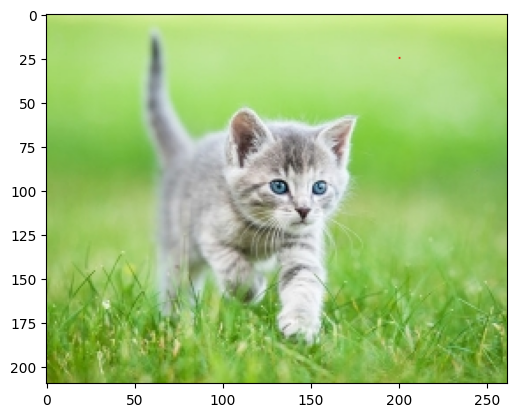

In [11]:
image[25, 200, 0] = 255
image[25, 200, 1] = 0
image[25, 200, 2] = 0

imshow(image)

Ein kleiner roter Punkt ist erschienen!

Jetzt ändern wir mal das komplette Bild, indem wir es leicht rötlich einfärben. Dafür erhöhen wir den Rot-Wert in jedem Pixel um 100. Da müssen wir aber aufpassen, denn kein Wert darf über `255` liegen. 

Um über das Bild zu laufen, nutzen wir zwei `for` Schleifen die ineinander liegen. 
Versuche mal den folgenden Code zu verstehen. Werfe zur Not noch einmal einen Blick in das andere Notebook. Uns kannst Du natürlich auch immer fragen :)

Vorher kommt noch einmal eine Box, die Dir vielleicht hilft, um das Konzept von zwei `for` Schleifen ineinander zu verstehen.

In [12]:
for i in range(5):
    for j in range(3):
        print("i:", i, "  j: ", j)

i: 0   j:  0
i: 0   j:  1
i: 0   j:  2
i: 1   j:  0
i: 1   j:  1
i: 1   j:  2
i: 2   j:  0
i: 2   j:  1
i: 2   j:  2
i: 3   j:  0
i: 3   j:  1
i: 3   j:  2
i: 4   j:  0
i: 4   j:  1
i: 4   j:  2


Wie du siehst wird `i` mit der äußeren Schleife von `0` auf `4` hochgezählt. Da jeweils der innere Code Block ausgeführt wird, zählt eine weitere Schleife `j` hoch. Wichtig für uns: Jede Kombination kommt genau einmal vor: Alle mögliche Werte von `i` mit allen möglichen Werten von `j`. Genau das nutzen wir, um alle Pixel einmal zu besuchen:

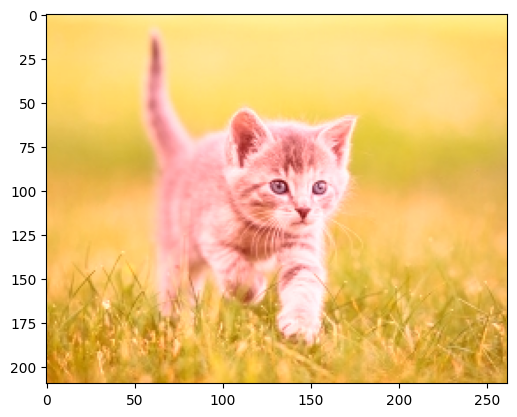

In [13]:
# wir laden noch einmal das Bild. 
# Wir haben ja sonst die ganze Zeit diesen roten Punkt von eben
image = load_image("./images/Kitten.jpg")

for row in range(image.shape[0]): # hier iterieren wir über alle Zeilen und nennen die aktuelle row
    for column in range(image.shape[1]): # hier über alle Spalten und nennen die aktuelle column
        # der neue Wert = der alte Wert + 100 
        old_value = image[row, column, 0] 
        new_value = old_value + 100
        
        # wir müssen sicherstellen, dass der neue Wert nicht über 255 liegt.
        # Wenn ja, setzen wir ihn auf das Maximum: 255
        
        if new_value > 255:
            new_value = 255
            
        # jetzt können wir den neuen Wert zuweisen
        
        image[row, column, 0] = new_value
        

imshow(image)

Eine rötliche Katze!

**Aufgabe:** Kannst du die Katze auch leicht bläulich einfärben?

In [14]:
# wir laden noch einmal das Bild. 
# Wir haben ja sonst die ganze Zeit einen Rot-Stich
image = load_image("./images/Kitten.jpg")

# Ab hier dein Code



**Zusatzaufgabe:** Nachdem wir die Katze wie ein Osterei bunt eingefärbt haben, lass uns doch nun mal abschließend versuchen alle Farben in dem Bild zu invertieren. Hierfür müssen wir alle Werte in dem Bild von dem Maximalwert ($255$) abziehen. Das bedeutet z.B. für ein Schwarzweißbild, dass Weiß zu Schwarz wird und umgekehrt. Bei mehreren Farbkanälen muss man dass dann für jeden Kanal einzeln machen.

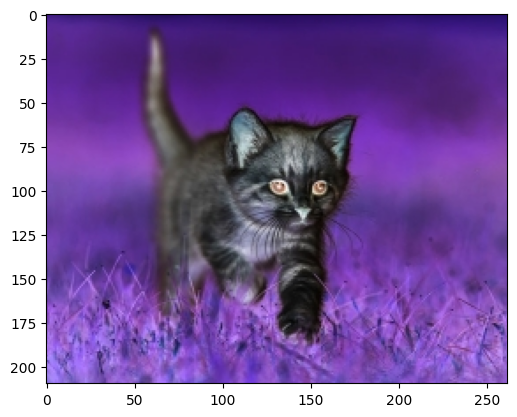

In [15]:
# wir laden das Bild. 
image = load_image("./images/Kitten.jpg")

# Ab hier dein Code

image_copy = copy(image)

for row in range(image.shape[0]): # hier iterieren wir über alle Zeilen und nennen die aktuelle row
    for column in range(image.shape[1]): # hier über alle Spalten und nennen die aktuelle column
        # --- Ab hier dein Code ---
        image_copy[row, column, 0] = 255 - image_copy[row, column, 0] # R
        image_copy[row, column, 1] = 255 - image_copy[row, column, 1] # G
        image_copy[row, column, 2] = 255 - image_copy[row, column, 2] # B
        
        # -------------------------
    
imshow(image_copy)

Klasse! Nachdem du nun ein paar Grundlagen zu Bildverarbeitung kennengelernt hast, können wir mit den Quantencomputern loslegen. Klicke dazu einfach [hier](./QolorQoding.ipynb).

Wenn du nochmal etwas in den Python Grundlagen nachschauen möchtest, kannst du das [hier](./Python_Basics.ipynb) machen.